# Лабораторная работа 5. Визуализация данных о погоде с помощью matplotlib. 

Цель работы: научиться обрабатывать и визуализировать данные, 
полученные с помощью API (на примере сервиса openweathermap).

Описание работы: получить данные о погоде за 5 последний дней и визуализировать эти данные, используя диаграмму рассеяния (scatterplot). 
Затем, посчитать среднюю температуру за каждый день и построить рядом (на этом же изображении) линейную диаграмму изменения температур.

Замечание: можно использовать другие сервисы для получения прогноза погоды на 7 дней (gismeteo, pogoda.yandex.ru), но сигнатура функций должна быть такая же как в примере ниже.


Лабораторная работа состоит из 2-х основных частей:
1. Получение данных посредством API.
2. Визуализация данных.

Выполним все этапы и визуализируем данные о погоде только за вчерашний день: 01.11.2021.

Начнем с части 1: получим данные в формате json через API openweathermap

In [ ]:
# example of one call api openweathermap

import requests
import json

city, lat, lon = "Saint Petersburg, RU", 33.44, -94.04
api_key = '26f1cc6b039373fdded0b5855a718b65'
dt = 1640034315
req = requests.get(
            f'http://api.openweathermap.org/data/2.5/'
            f'onecall/timemachine?lat={lat}&lon={lon}&dt={dt}&'
            f'appid={api_key}&lang=ru&units=metric')

req_obj = json.loads(req.text)  # Преобразуем объект типа Request в json-формат
print(req_obj)

{'lat': 33.44, 'lon': -94.04, 'timezone': 'America/Chicago', 'timezone_offset': -21600, 'current': {'dt': 1640034315, 'sunrise': 1640006156, 'sunset': 1640041914, 'temp': 4.6, 'feels_like': 3.71, 'pressure': 1023, 'humidity': 84, 'dew_point': 2.13, 'uvi': 0.21, 'clouds': 90, 'visibility': 10000, 'wind_speed': 1.34, 'wind_deg': 103, 'wind_gust': 2.68, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'пасмурно', 'icon': '04d'}]}, 'hourly': [{'dt': 1639958400, 'temp': 5.01, 'feels_like': 3.91, 'pressure': 1025, 'humidity': 67, 'dew_point': -0.53, 'uvi': 0, 'clouds': 1, 'visibility': 10000, 'wind_speed': 1.54, 'wind_deg': 10, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'небольшой дождь', 'icon': '10n'}], 'rain': {'1h': 0.25}}, {'dt': 1639962000, 'temp': 3.15, 'feels_like': 3.15, 'pressure': 1025, 'humidity': 80, 'dew_point': 0.04, 'uvi': 0, 'clouds': 1, 'visibility': 10000, 'wind_speed': 0.89, 'wind_deg': 154, 'wind_gust': 1.79, 'weather': [{'id': 800, 'main': 'Clear', '

In [ ]:
# key = "YOUR_PERSONAL_KEY_IS_HERE"

def getweather(api_key=None):
    import json
    import requests
    city, lat, lon = "Saint Petersburg, RU", 59.57, 30.19

    dt = 1640034315  # datetime of 01/11/2021 in unix-like format
    # Для определения unixtime диапазона для получения температур, 
    # можно использовать сервис https://unixtime-converter.com/

    if api_key:
        result = dict()
        req = requests.get(
            f'http://api.openweathermap.org/data/2.5/'
            f'onecall/timemachine?lat={lat}&lon={lon}&dt={dt}&'
            f'appid={api_key}&lang=ru&units=metric')
        
        # для других параметров см. https://openweathermap.org/api/one-call-api#history

        req_obj = json.loads(req.text)  # Преобразуем объект типа Request в json-формат
        # Сохраним результаты температур в формате json, чтобы ниже их визуализировать
        result['city'] = city
        measures = [{"dt": str(measure['dt']), "temp": str(measure['temp'])} for measure in req_obj["hourly"]]
        

        result['temps'] = measures
        return json.dumps(result)


weather_data_json = getweather(api_key)


При вызове этой функции, мы сможем использовать данные в формате json, которые она возвращает. Альтернативный подход - сразу же сформировать из этих данных корректный файл с данными в csv-формате (см. документацию https://docs.python.org/3/library/csv.html).

__Перейдем к шагу 2:__
визуализируем полученные данные с помощью matplotlib и типа диаграммы scatterplot.

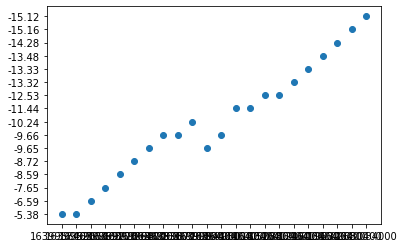

In [ ]:
def visualise_data(json_data=''):

    if json_data:
        import matplotlib.pyplot as pplt
        import pandas
        # Мы можем загрузить данные в пригодный для дальнейшей обработки формат
        # с помощью метода read_json из pandas.
        data = pandas.read_json(json_data)
        # print(data)
        city_name = data['city']

        # получим отдельные столбцы с датами 
        dates = [_d['dt'] for _d in data['temps'][:]]
        # и тепературами
        temps = [_t['temp'] for _t in data['temps'][:]]

        # построим их на диаграмме рассеяния
        pplt.scatter(dates, temps)


        pplt.show()

        # построенный график необходимо оптимизировать:
        #  - добавить название 
        #  - правильно расположить ось абсцисс
        #  - упростить вывод дат (на этом графике они выводятся в формате unixtime)
        #  - вывести более строгие значения для подписей осей абсцисс и ординат 
        #  (xticks, yticks)
        # - добавить на график температуры остальных дат 
        # - добавить второй график со средними значениями

visualise_data(weather_data_json)


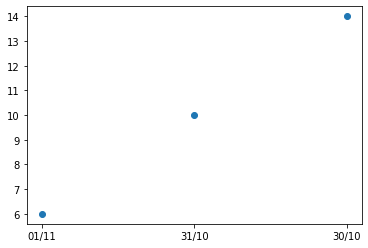

In [ ]:
# пример простой визуализации с использованием scatterplot / диаграммы рассеяния
import matplotlib.pyplot as pplt


dates, temps = ['01/11', '31/10', '30/10'], [6, 10.0, 14.0]
pplt.scatter(dates, temps)
pplt.show()

# Задание по matplotlib

Построим точечный график прогноза погоды на следующие 5 дней.

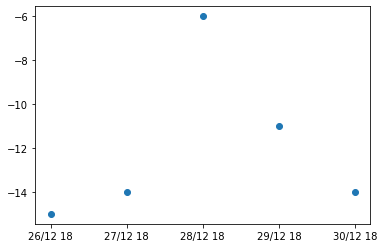

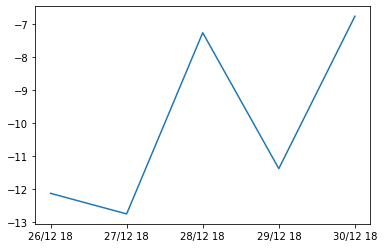

In [ ]:
from datetime import datetime
import matplotlib.pyplot as pplt

def getweather(api_key=None):
    import json
    import requests
    city, lat, lon = "Saint Petersburg, RU", 59.57, 30.19
    api_key = '26f1cc6b039373fdded0b5855a718b65'
    dt = 1640034315

    if api_key:
        """
        req = requests.get(
            f'http://api.openweathermap.org/data/2.5/'
            f'onecall/timemachine?lat={lat}&lon={lon}&'
            f'appid={api_key}&type=day&cnt=5')
        """
        req = requests.get("http://api.openweathermap.org/data/2.5/forecast",
                           params={'lat': lat, 'lon': lon, 'units': 'metric', 'lang': 'ru', 'APPID': api_key})
        
        data = req.json()
        dates, temps = [], []
        for i in data['list']:
            temps.append(int('{0:+3.0f}'.format(i['main']['temp'])))
            dates.append(datetime.utcfromtimestamp(i['dt']).strftime('%d/%m %H'))
        
        date, temp = [], []

        for i in range(0, len(temps), 8):
            temp.append(temps[i])
            date.append(dates[i])

        a_temp, a_date = [], []

        for i in range(0, len(temps), 8):
          sum = 0
          for j in range(8):
              sum = sum + temps[i+j]
          
          a_temp.append(sum/8)
          a_date.append(dates[i])

        pplt.scatter(date, temp)
        pplt.show()
        pplt.plot(a_date, a_temp)
        pplt.show()
        
    

weather_data_json = getweather()
